In [4]:
import pandas as pd
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

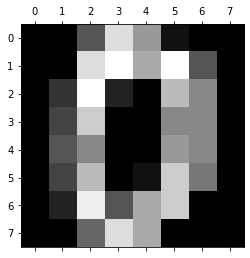

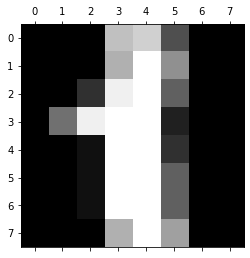

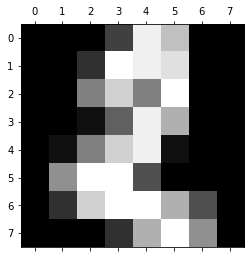

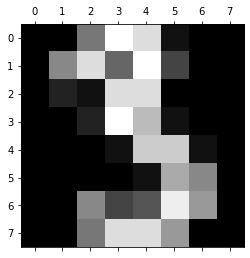

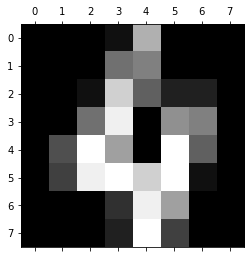

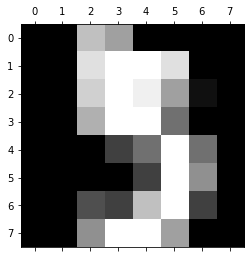

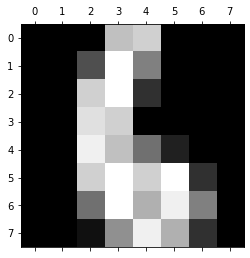

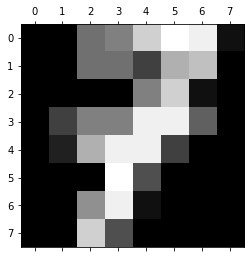

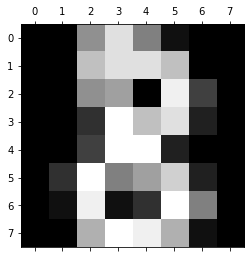

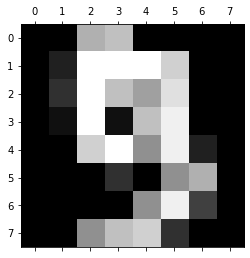

In [8]:
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i]) 
plt.show() 

In [9]:
X = digits.data
y = digits.target

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Задание 1. Обучить дерево

In [21]:
model1 = DecisionTreeClassifier()
cvs = cross_val_score(model1, X, y, cv=10)
cvs.mean()

0.8330384854127871

# Задание 2. Обучить бэггинг

In [27]:
from sklearn.ensemble import BaggingClassifier

In [32]:
clf = BaggingClassifier(model1, n_estimators=100)
cvs2 = cross_val_score(clf, X, y, cv=10)
cvs2.mean()

0.9209497206703909

# Задание 3. Подобрать параметры бэггинг

In [33]:
from math import sqrt

In [34]:
X.shape

(1797, 64)

In [37]:
clf2 = BaggingClassifier(model1, n_estimators=100, max_features=int(sqrt(X.shape[1])))
cvs3 = cross_val_score(clf2, X, y, cv=10)
cvs3.mean()

0.9293202979515829

# Задание 4

In [42]:
model2 = DecisionTreeClassifier(max_features=int(sqrt(X.shape[1])))
clf4 = BaggingClassifier(model2, n_estimators=100) 
cvs4 = cross_val_score(clf4, X, y, cv=10)
cvs4.mean()

0.9538112973308503

# Задание 5

In [43]:
from sklearn.ensemble import RandomForestClassifier

### от количества деревьев:

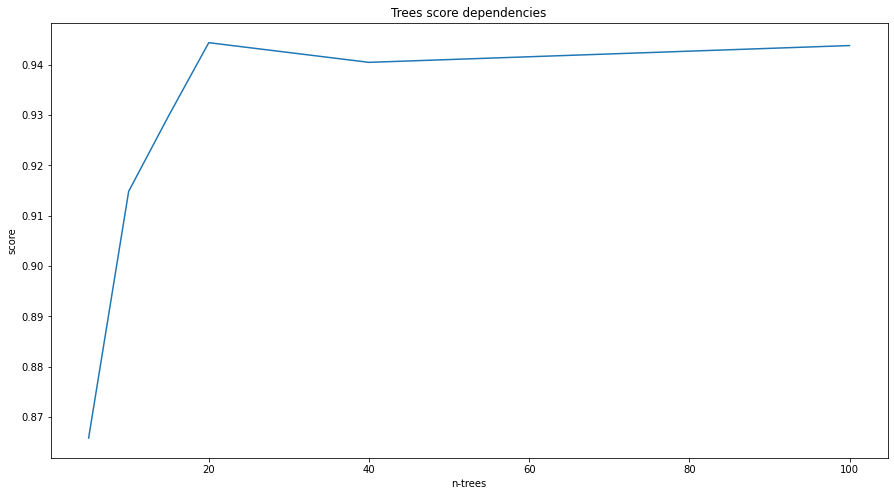

Wall time: 7.54 s


In [45]:
%%time
def plot_rf_trees_score():
    trees = [5, 10, 15, 20, 40, 100]
    results = []
    for tree in trees:
        rf = RandomForestClassifier(n_estimators=tree)
        results.append(cross_val_score(rf, X, y, cv=10).mean())
    plt.figure(figsize=(15, 8))
    plt.plot(trees, results)
    plt.xlabel("n-trees")
    plt.ylabel("score")
    plt.title("Trees score dependencies")
    plt.show()
plot_rf_trees_score()

При большом увеличении количества деревьев ошибка не меняется

### от кол-ва признаков

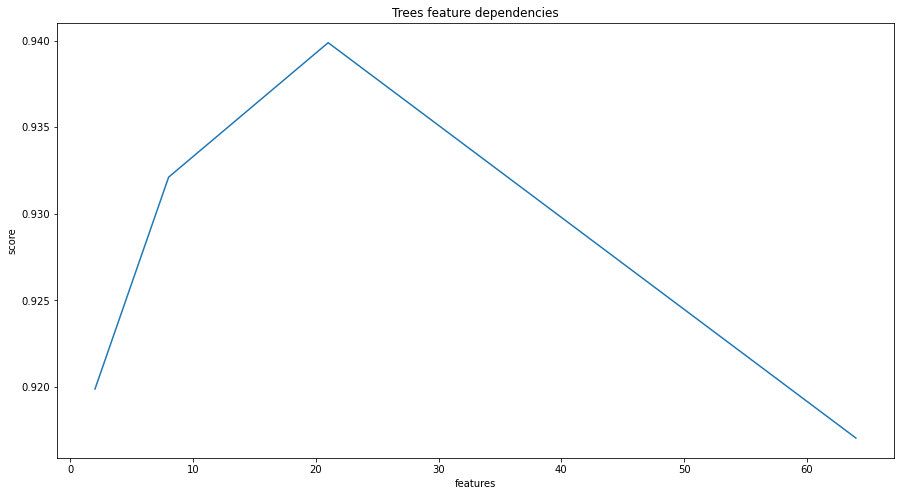

Wall time: 5.78 s


In [47]:
%%time
def plot_rf_trees_max_features():
    d = X.shape[1]
    features = [2, int(np.sqrt(d)), int(d/3), d]
    results = []
    for f in features:
        rf = RandomForestClassifier(n_estimators=20, max_features=f)
        results.append(cross_val_score(rf, X, y, cv=10).mean())
    plt.figure(figsize=(15, 8))
    plt.plot(features, results)
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees feature dependencies")
    plt.show()
plot_rf_trees_max_features() 

предположение о том, что нужно брать sqrt(d) признаков подтверждается

### от глубины дерева

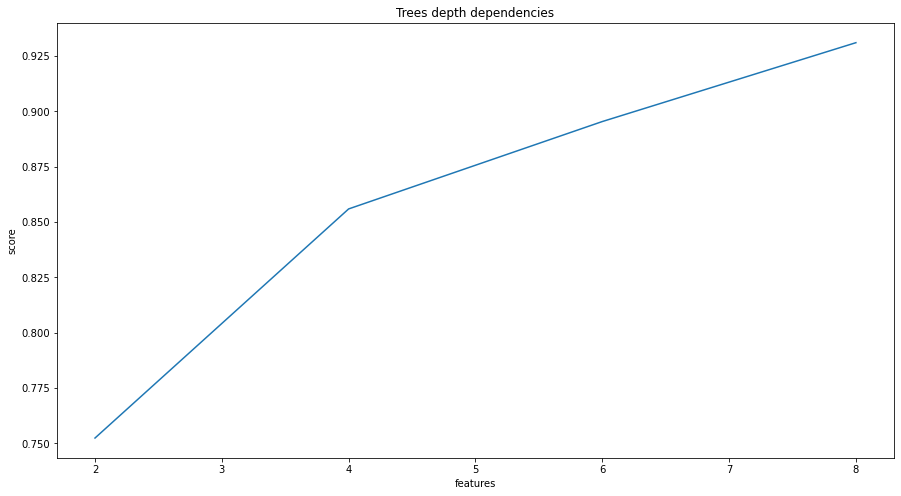

Wall time: 2.64 s


In [48]:
%%time
def plot_rf_tree_depth():
    d = X.shape[1]
    depth = [2, 4, 6, 8]
    results = []
    for d in depth:
        rf = RandomForestClassifier(n_estimators=20, max_depth=d)
        results.append(cross_val_score(rf, X, y, cv=10).mean())
    plt.figure(figsize=(15, 8))
    plt.plot(depth, results)
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees depth dependencies")
    plt.show()
plot_rf_tree_depth() 

чем больше глубина, тем больше точность предсказания

Ответ 5: 2 3 4 7